In [529]:
# Imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gps
from datetime import datetime
from wordcloud import WordCloud
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
from dataprep.eda import *
import warnings
warnings.filterwarnings("ignore")

In [530]:
# Fetchs data file and assigns it to df(dataframe)
df = pd.read_excel("Baltimore_Crime_Data_2022.xlsx")

In [531]:
# Prints First 5 rows of dataframe
df.head()

,X,Y,ccno,crimedatetime,crimecode,location,description,inside_outside,weapon,post,...,ethnicity,district,neighborhood,latitude,longitude,geolocation,premise,total_incidents,objectid,shape
0,-76.565458,39.277067,22L06487,2022/12/21 12:14:00+00,6C,3700 BOSTON ST,LARCENY,NaN,NaN,231,...,NaN,SOUTHEAST,Canton Industrial Area,39.277067,-76.565458,"(39.277067000000002,-76.565458000000007)",NaN,1,150,NaN
1,-76.675177,39.266512,22L06649,2022/12/21 21:00:00+00,4E,1200 HAVERHILL RD,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,832,...,NOT_HISPANIC_OR_LATINO,SOUTHWEST,Violetville,39.266512,-76.675177,"(39.266511999999999,-76.675177000000005)",NaN,1,151,NaN
2,-76.675177,39.266512,22L06649,2022/12/21 21:00:00+00,4E,1200 HAVERHILL RD,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,832,...,NOT_HISPANIC_OR_LATINO,SOUTHWEST,Violetville,39.266512,-76.675177,"(39.266511999999999,-76.675177000000005)",NaN,1,152,NaN
3,-76.554995,39.330640,22L06652,2022/12/21 21:20:00+00,4E,4700 GREENHILL AVE,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,443,...,NaN,NORTHEAST,Frankford,39.330640,-76.554995,"(39.330640000000002,-76.554995000000005)",NaN,1,153,NaN
4,-76.542644,39.276615,22L06655,2022/12/21 22:00:00+00,4E,6100 SHIPVIEW WAY,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,234,...,UNKNOWN,SOUTHEAST,O'Donnell Heights,39.276615,-76.542644,"(39.276615,-76.542643999999996)",NaN,1,154,NaN


In [532]:
# Prints (total_rows, total_columns) of dataframe
df.shape

(40543, 23)

In [533]:
# Prints statistical information of numeric values of dataframe
df.describe()

,X,Y,age,latitude,longitude,total_incidents,objectid,shape
count,40522.000000,40522.000000,34216.000000,40522.000000,40522.000000,40543.0,40543.000000,0.0
mean,-73.590683,37.752433,37.002250,37.752433,-73.590683,1.0,44923.927657,NaN
std,14.925660,7.656974,16.000308,7.656974,14.925660,0.0,97253.674369,NaN
min,-76.711175,0.000000,-27.000000,0.000000,-76.711175,1.0,150.000000,NaN
25%,-76.647223,39.285584,26.000000,39.285584,-76.647223,1.0,15965.500000,NaN
50%,-76.613141,39.300410,34.000000,39.300410,-76.613141,1.0,26101.000000,NaN
75%,-76.583633,39.323818,47.000000,39.323818,-76.583633,1.0,36236.500000,NaN
max,0.000000,39.371979,635.000000,39.371979,0.000000,1.0,553884.000000,NaN


In [534]:
# Print basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40543 entries, 0 to 40542
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                40522 non-null  float64
 1   Y                40522 non-null  float64
 2   ccno             40543 non-null  object 
 3   crimedatetime    40543 non-null  object 
 4   crimecode        40543 non-null  object 
 5   location         40385 non-null  object 
 6   description      40543 non-null  object 
 7   inside_outside   27403 non-null  object 
 8   weapon           17266 non-null  object 
 9   post             39903 non-null  object 
 10  gender           35382 non-null  object 
 11  age              34216 non-null  float64
 12  race             32993 non-null  object 
 13  ethnicity        17155 non-null  object 
 14  district         40000 non-null  object 
 15  neighborhood     39903 non-null  object 
 16  latitude         40522 non-null  float64
 17  longitude   

In [535]:
# Prints Duplicate values if any
df.duplicated().any()

False

In [536]:
# Prints the sum of null values in all the columns of dataframe
df.isnull().sum()

X                     21
Y                     21
ccno                   0
crimedatetime          0
crimecode              0
location             158
description            0
inside_outside     13140
weapon             23277
post                 640
gender              5161
age                 6327
race                7550
ethnicity          23388
district             543
neighborhood         640
latitude              21
longitude             21
geolocation            0
premise            13140
total_incidents        0
objectid               0
shape              40543
dtype: int64

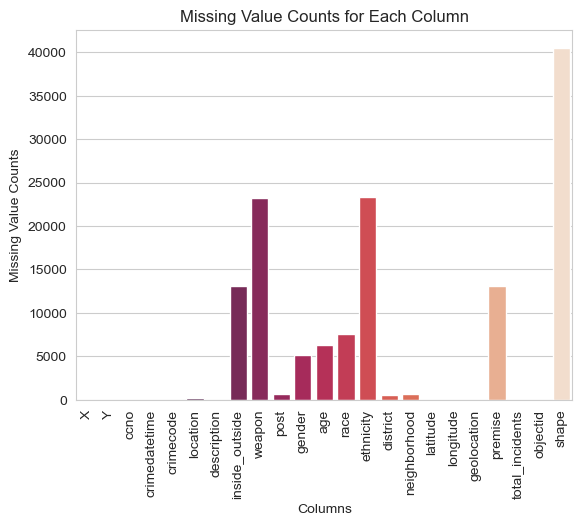

In [537]:
# Get Missing value counts
null_counts = [df[col].isnull().sum() for col in df.columns]

# Create a bar plot
sns.barplot(x=list(df.columns), y=null_counts, palette='rocket')

# Set axis labels and title
plt.xlabel('Columns')
plt.ylabel('Missing Value Counts')
plt.title('Missing Value Counts for Each Column')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [538]:
# Prints count of unique values of each column of the dataframe
df.nunique()

X                  22804
Y                  22245
ccno               36465
crimedatetime      28102
crimecode             64
location            9811
description           13
inside_outside         4
weapon                21
post                 127
gender                 6
age                  110
race                   6
ethnicity              6
district              10
neighborhood         544
latitude           22249
longitude          22808
geolocation        23732
premise               50
total_incidents        1
objectid           40543
shape                  0
dtype: int64

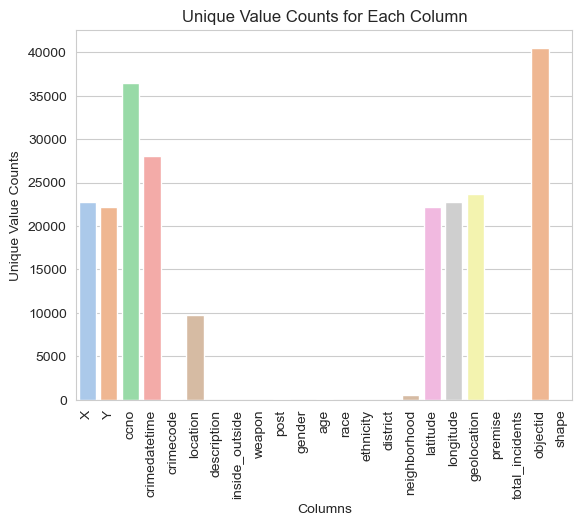

In [539]:
# Get unique value counts
value_counts = [df[col].nunique() for col in df.columns]

# Create a bar plot
sns.barplot(x=list(df.columns), y=value_counts, palette='pastel')

# Set axis labels and title
plt.xlabel('Columns')
plt.ylabel('Unique Value Counts')
plt.title('Unique Value Counts for Each Column')
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [541]:
# Creates a variable containing geodataframe containing latitude and longitude pairs
df_geo = gps.GeoDataFrame(df, geometry = gps.points_from_xy(df.longitude, df.latitude))
df_geo

,X,Y,ccno,crimedatetime,crimecode,location,description,inside_outside,weapon,post,...,district,neighborhood,latitude,longitude,geolocation,premise,total_incidents,objectid,shape,geometry
0,-76.565458,39.277067,22L06487,2022/12/21 12:14:00+00,6C,3700 BOSTON ST,LARCENY,NaN,NaN,231,...,SOUTHEAST,Canton Industrial Area,39.277067,-76.565458,"(39.277067000000002,-76.565458000000007)",NaN,1,150,NaN,POINT (-76.56546 39.27707)
1,-76.675177,39.266512,22L06649,2022/12/21 21:00:00+00,4E,1200 HAVERHILL RD,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,832,...,SOUTHWEST,Violetville,39.266512,-76.675177,"(39.266511999999999,-76.675177000000005)",NaN,1,151,NaN,POINT (-76.67518 39.26651)
2,-76.675177,39.266512,22L06649,2022/12/21 21:00:00+00,4E,1200 HAVERHILL RD,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,832,...,SOUTHWEST,Violetville,39.266512,-76.675177,"(39.266511999999999,-76.675177000000005)",NaN,1,152,NaN,POINT (-76.67518 39.26651)
3,-76.554995,39.330640,22L06652,2022/12/21 21:20:00+00,4E,4700 GREENHILL AVE,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,443,...,NORTHEAST,Frankford,39.330640,-76.554995,"(39.330640000000002,-76.554995000000005)",NaN,1,153,NaN,POINT (-76.55500 39.33064)
4,-76.542644,39.276615,22L06655,2022/12/21 22:00:00+00,4E,6100 SHIPVIEW WAY,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,234,...,SOUTHEAST,O'Donnell Heights,39.276615,-76.542644,"(39.276615,-76.542643999999996)",NaN,1,154,NaN,POINT (-76.54264 39.27661)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40538,-76.533684,39.324989,22K07987,2022/11/26 09:40:00+00,4E,5000 DENVIEW WAY,COMMON ASSAULT,NaN,NaN,444,...,NORTHEAST,FRANKFORD,39.324989,-76.533684,"(39.32498944075,-76.5336840306259)",NaN,1,553880,NaN,POINT (-76.53368 39.32499)
40539,-76.645590,39.307196,22K08168,2022/11/26 22:08:00+00,4E,1600 BRUCE CT,COMMON ASSAULT,NaN,NaN,734,...,WESTERN,SANDTOWN-WINCHESTER,39.307196,-76.645590,"(39.3071961935082,-76.6455899792986)",NaN,1,553881,NaN,POINT (-76.64559 39.30720)
40540,-76.573641,39.294542,22K08198,2022/11/26 23:28:00+00,5F,100 N ELLWOOD AVE,BURGLARY,NaN,NaN,222,...,SOUTHEAST,PATTERSON PARK NEIGHBORHOOD,39.294542,-76.573641,"(39.2945423392997,-76.5736411920235)",NaN,1,553882,NaN,POINT (-76.57364 39.29454)
40541,-76.609219,39.274038,22K08154,2022/11/26 19:30:00+00,4E,1400 BATTERY AVE,COMMON ASSAULT,NaN,NaN,943,...,SOUTHERN,RIVERSIDE,39.274038,-76.609219,"(39.2740379497083,-76.6092193359687)",NaN,1,553883,NaN,POINT (-76.60922 39.27404)


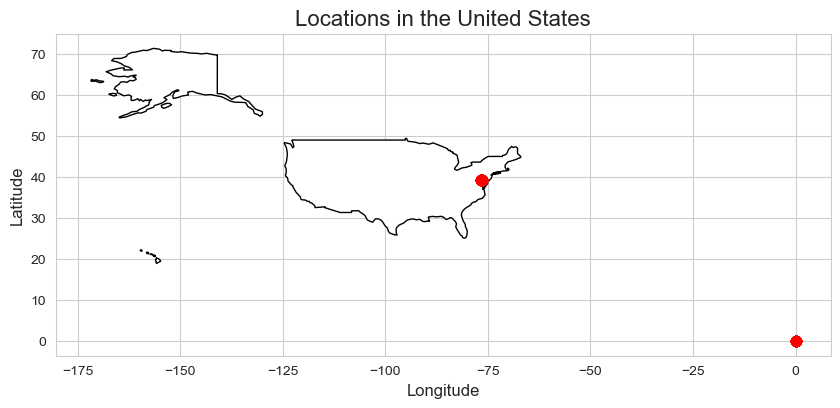

In [542]:
# Fetch world map
world_data = gps.read_file(gps.datasets.get_path('naturalearth_lowres'))

# Filter to the United States and set figure size
US_map = world_data[world_data.iso_a3 == 'USA'].plot(figsize=(10, 6), color='white', edgecolor='black')

# Plot geo data on the map
df_geo.plot(ax=US_map, color='red', legend=True, markersize=50)

# Set title and axis labels
plt.title('Locations in the United States', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

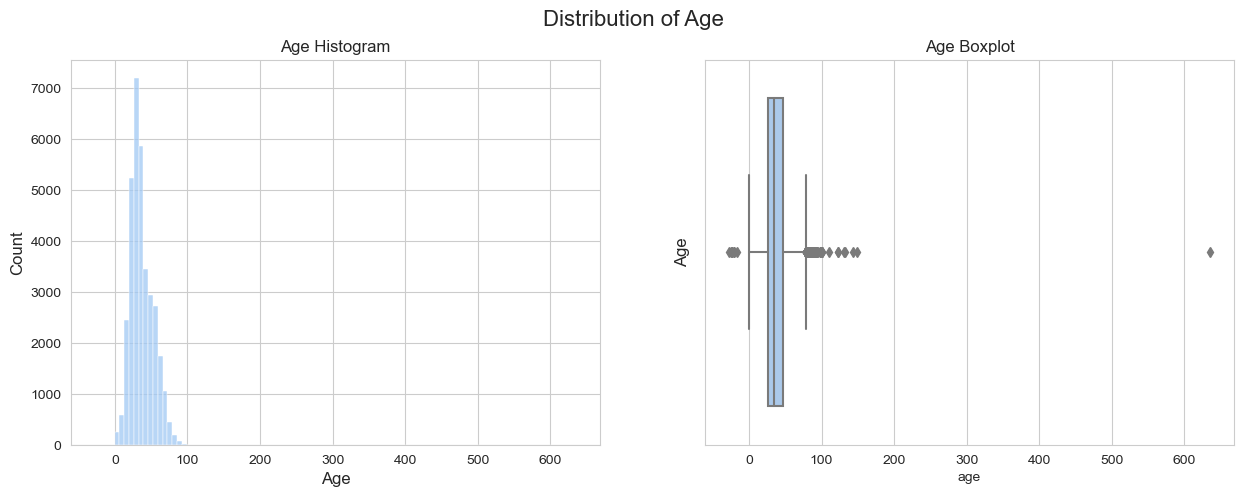

In [543]:
# Create a figure with 1 row and 2 columns with a figure size of 15x5
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Create a boxplot for the 'age' column and assign it to the right subplot (axs[1])
sns.boxplot(x='age', data=df, ax=axs[1])
axs[1].set_title("Age Boxplot")
axs[1].set_ylabel('Age', fontsize=12)

# Create a histogram for the 'age' column and assign it to the left subplot (axs[0])
sns.histplot(x='age', data=df, bins=100, ax=axs[0])
axs[0].set_title("Age Histogram")
axs[0].set_xlabel('Age', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)

# Set title and show plot
plt.suptitle('Distribution of Age', fontsize=16)
plt.show()


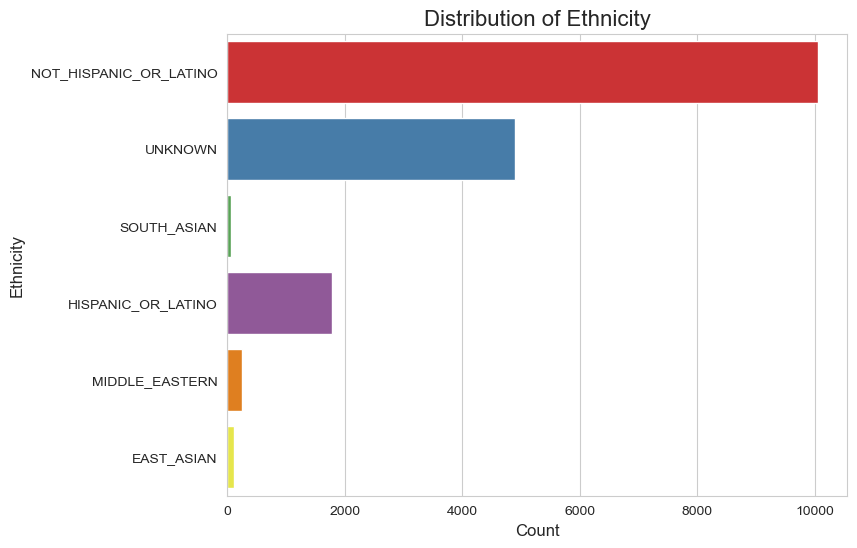

In [544]:
# Create a countplot for the 'ethnicity' column and assign it to the y-axis
plt.figure(figsize=(8, 6))
sns.countplot(y='ethnicity', data=df, palette='Set1')

# Set the x-axis and y-axis labels
plt.xlabel('Count', fontsize=12)
plt.ylabel('Ethnicity', fontsize=12)

# Set the title and show the plot
plt.title('Distribution of Ethnicity', fontsize=16)
plt.show()

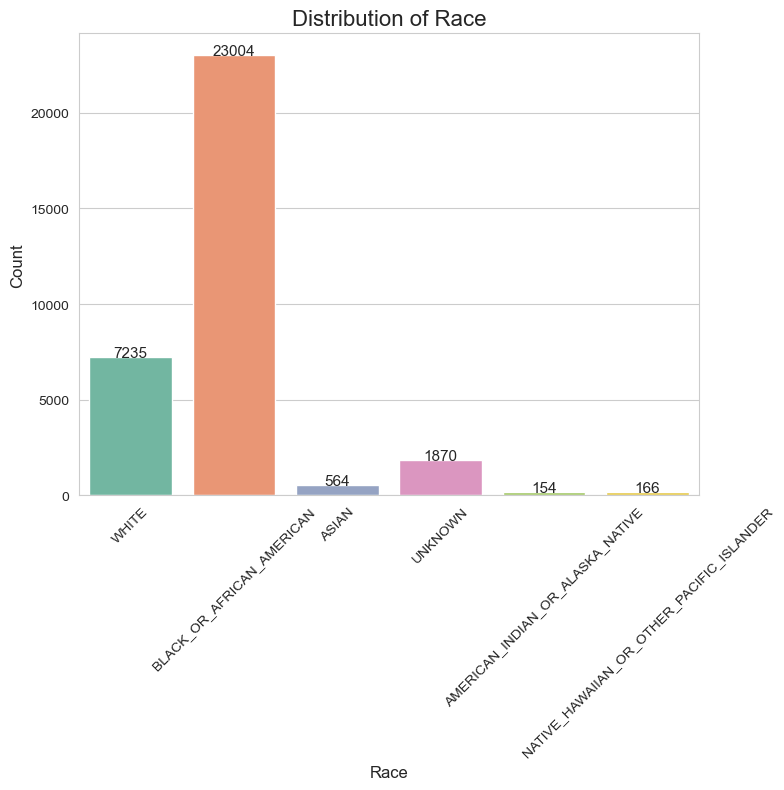

In [545]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.countplot(x='race', data=df, palette='Set2', ax=ax)

# Set axis labels and title
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Race', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 2, 
            str(i.get_height()), fontsize=11, ha='center')

plt.show()

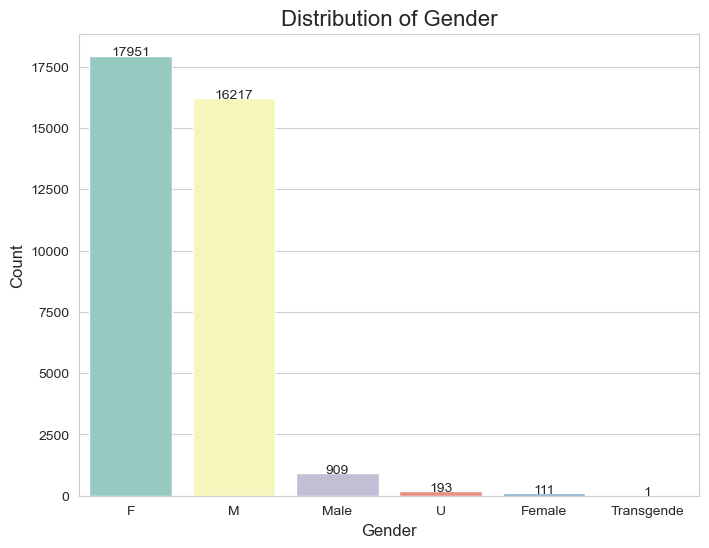

In [546]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.countplot(x='gender', data=df, palette='Set3', ax=ax)

# Set axis labels and title
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Gender', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(i.get_height()), fontsize=10, ha='center')

plt.show()

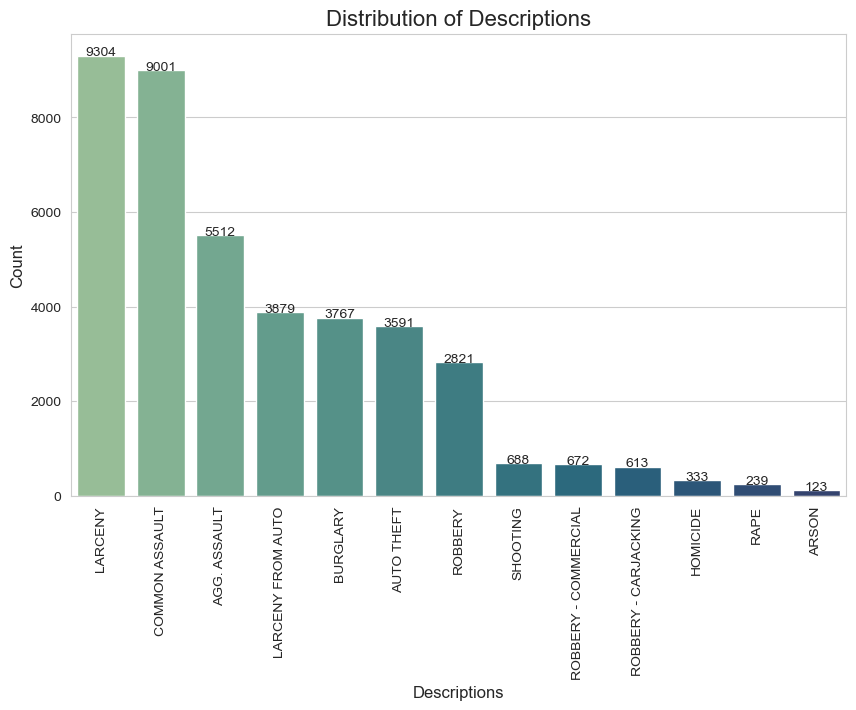

In [547]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart using Seaborn
sns.countplot(x='description', data=df, palette='crest', ax=ax, order=df['description'].value_counts().index)

# Set axis labels and title
ax.set_xlabel('Descriptions', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Descriptions', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(round(i.get_height(), 2)), fontsize=10, ha='center')

plt.show()

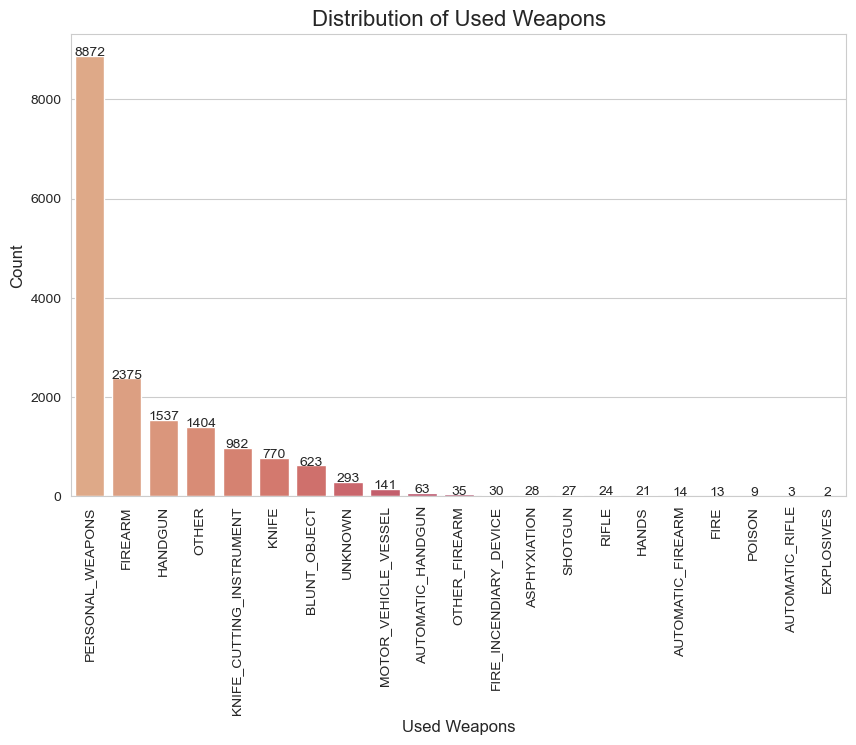

In [548]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart using Seaborn
sns.countplot(x='weapon', data=df, palette='flare', ax=ax, order=df['weapon'].value_counts().index)

# Set axis labels and title
ax.set_xlabel('Used Weapons', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Used Weapons', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(round(i.get_height(), 2)), fontsize=10, ha='center')

plt.show()

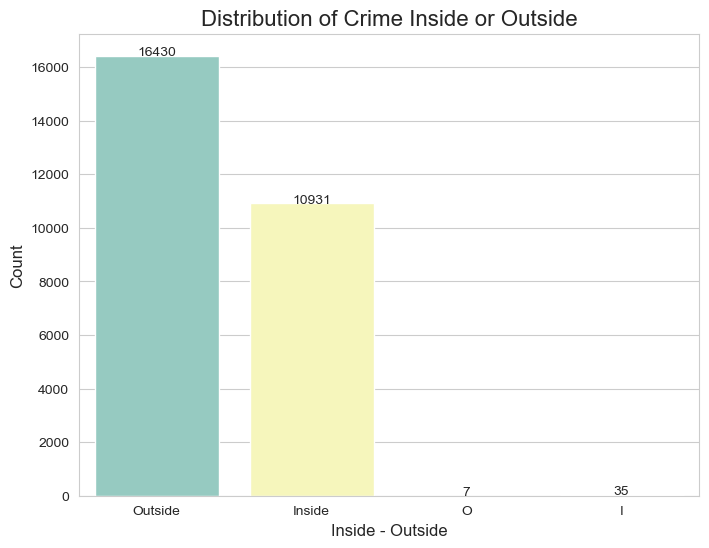

In [549]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.countplot(x='inside_outside', data=df, palette='Set3', ax=ax)

# Set axis labels and title
ax.set_xlabel('Inside - Outside', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Crime Inside or Outside', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(i.get_height()), fontsize=10, ha='center')

plt.show()

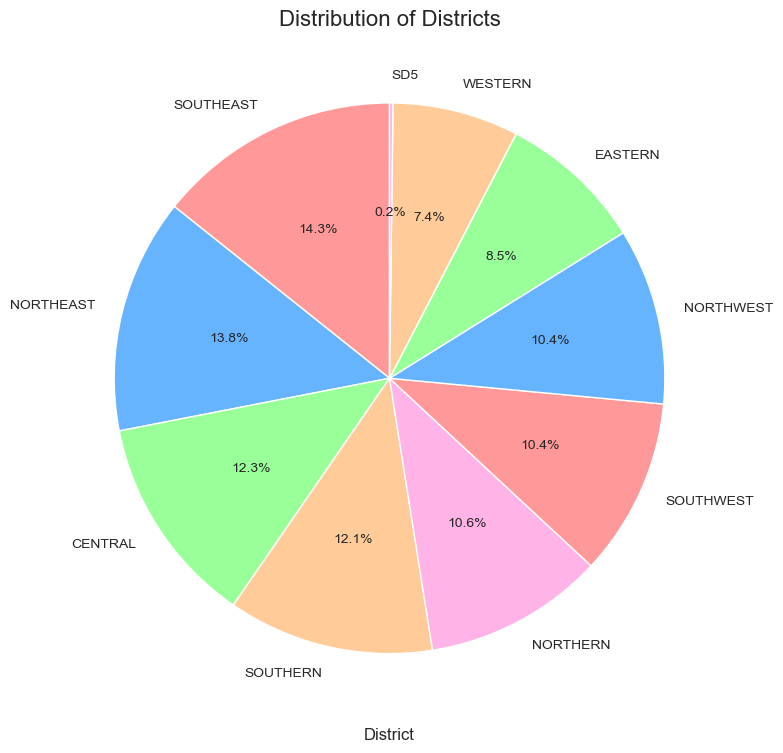

In [550]:
# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6']

# Plot the pie chart
df["district"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, ax=ax)

# Set axis labels and title
ax.set_xlabel('District', fontsize=12)
ax.set_ylabel('')
ax.set_title('Distribution of Districts', fontsize=16)

# Add spacing around the chart
plt.tight_layout()

plt.show()


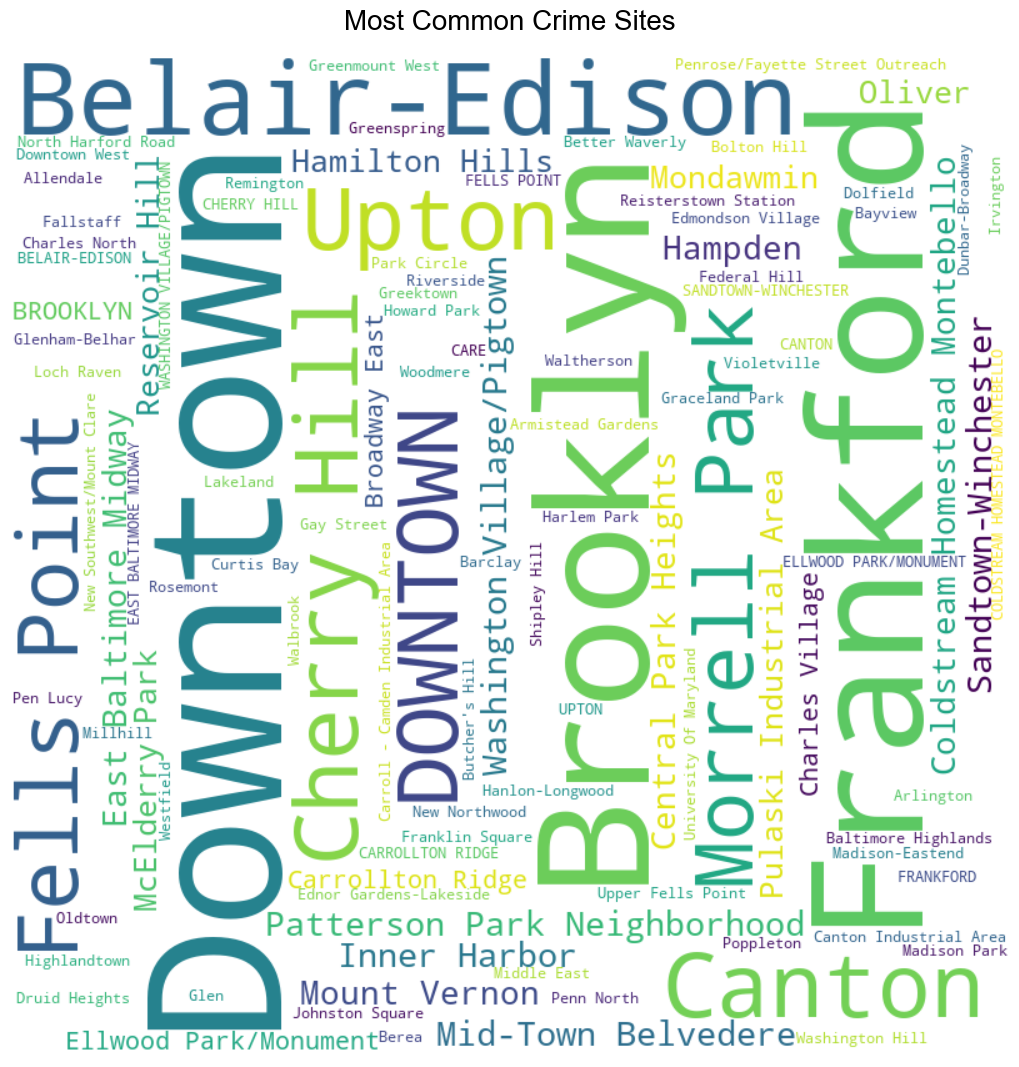

In [551]:
# Create a dictionary of neighborhood counts
neighborhood_counts = dict(df['neighborhood'].value_counts())

# Generate word cloud image
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10, colormap='viridis', max_words=df['neighborhood'].nunique()).generate_from_frequencies(neighborhood_counts)

# Display the generated image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

# Add a title
plt.title('Most Common Crime Sites', fontsize=20, pad=20, color='black')

# Show the plot
plt.show()


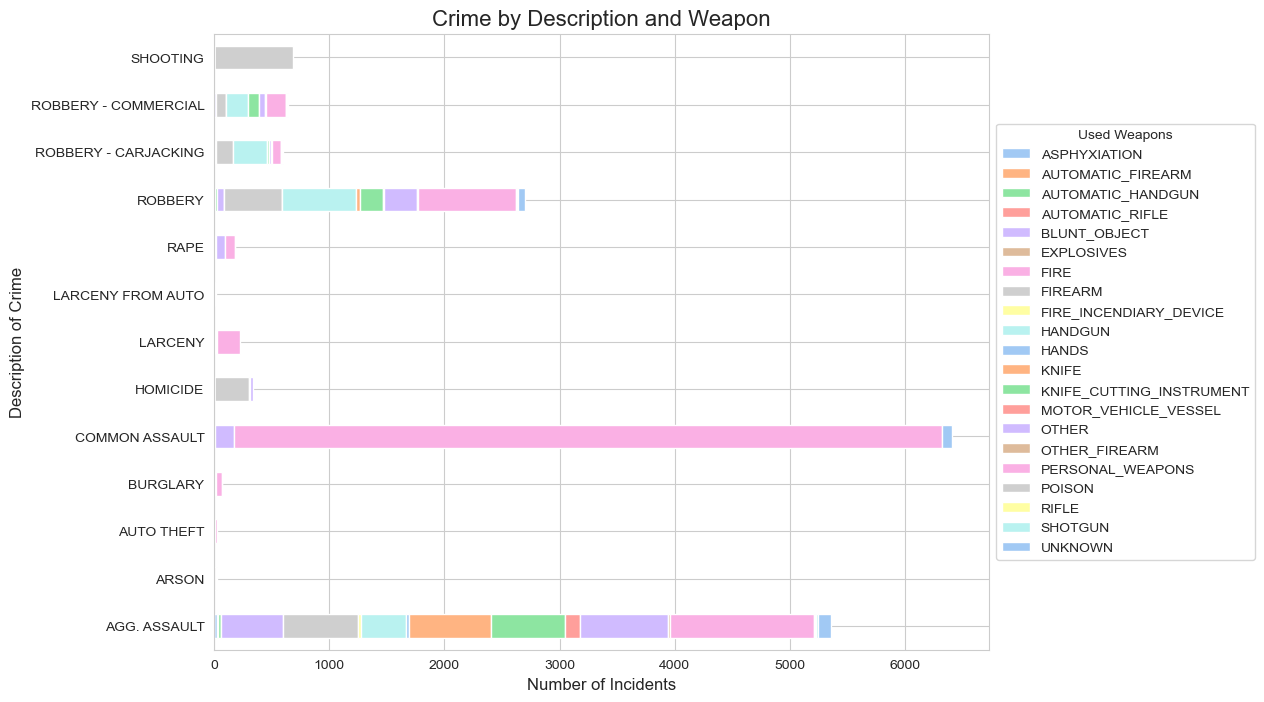

In [552]:
# Group the data by description and weapon, and count the number of occurrences
grouped = df.groupby(['description', 'weapon'])['objectid'].count().reset_index()

# Pivot the data to create a matrix with description as rows and weapon as columns
pivoted = grouped.pivot(index='description', columns='weapon', values='objectid').fillna(0)

# Create a horizontal stacked bar chart
pivoted.plot(kind='barh', stacked=True, figsize=(10,8))

# Add title and axis labels
plt.title('Crime by Description and Weapon', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Description of Crime', fontsize=12)

# Set legend
plt.legend(title='Used Weapons', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [553]:
# Create a pairplot of the data frame (df)
#sns.pairplot(df)

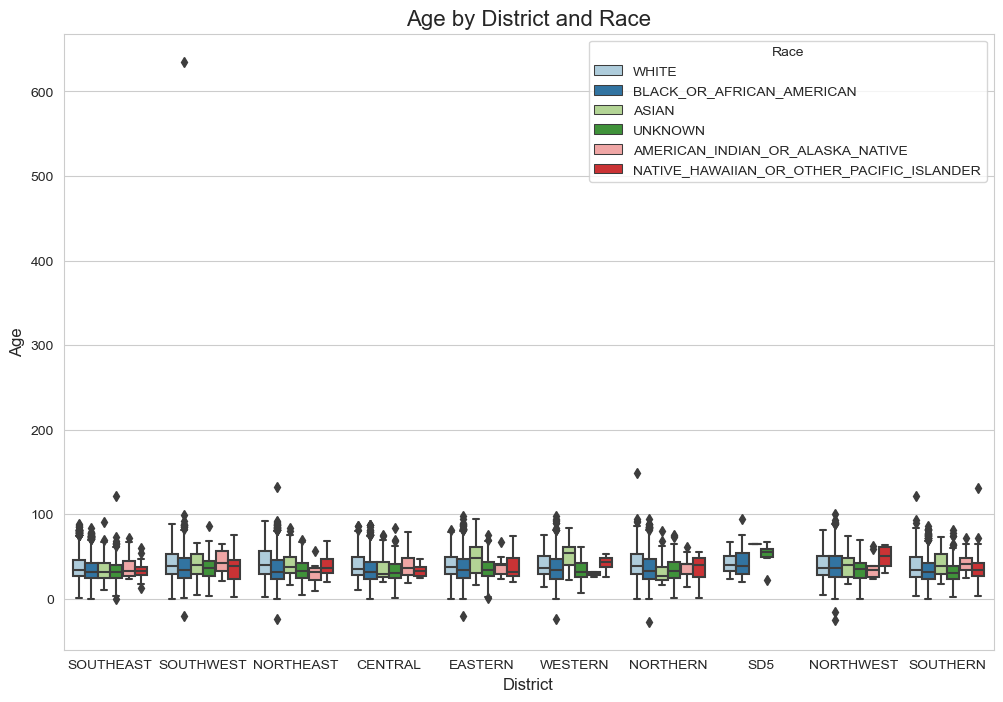

In [554]:
#Create a boxplot for the 'age' column by 'district', with 'race' as the hue and assign it to the axes (ax)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='district', y='age', data=df, hue='race', palette='Paired', width=0.8)

#Add title and axis labels
plt.title('Age by District and Race', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Age', fontsize=12)

#Set legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Race', loc='upper right')

plt.show()

# Data Cleaning and Tranformation

### Dropping the unnecessary columns:
- To start with, as we have seen so far the coordinates (latitude and longitude) are not so useful for us to draw any conclusion out of it. Also, the columns <b>X</b>, <b>Y</b>, <b>latitude</b>, <b>longitude</b>, <b>geolocation</b> and a new one created by us <b>geometry</b> this all have the coordinate values. Thus, we will drop this columns.
- Secondly, the <b>ccno</b> and <b>objectid</b> has almost every values as unique and which does not provide us with any context related to data.On the other hand, for <b>total_incidents</b> have just one value which is 1, and <b>shape</b> column is NaN. Thus, both columns will be dropped.
- Moreover, the <b>ethnicity</b> has to many missing values and does not add more context to our data so it can be dropped.
- Lastly, there are many cloumns providing lacation informations, the <b>location</b> column has to many uniques values for a catagorical variable while as we know <b>post</b> column is derived using neighborhoods it can be dropped as well.

In [555]:
df.drop(['X', 'Y', 'ccno', 'location', 'post', 'latitude', 'geometry', 'longitude', 'geolocation', 'total_incidents', 'objectid', 'shape', 'ethnicity'], axis=1, inplace=True)

### Transforming the crimedatetime:
- Here we will divide the date and time for better usage for analysis.
- First, we will convert the crimedatetime to Date and Time column and then the from the Date column we will select just the Month's values as we have only 2022 years data and days are too many for a catagorical variable.
- Thus, after transforming the Date we will end up with just the month name.

In [556]:
df['crimedatetime'] = pd.to_datetime(df['crimedatetime'])

# Split DateTime into separate Date and Time columns
df['Date'] = df['crimedatetime'].dt.date
df['Time'] = df['crimedatetime'].dt.time

# convert date format to just month
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')

# convert month numbers to month names
df['Month_name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

df.head()

,crimedatetime,crimecode,description,inside_outside,weapon,gender,age,race,district,neighborhood,premise,Date,Time,Month,Month_name
0,2022-12-21 12:14:00+00:00,6C,LARCENY,NaN,NaN,NaN,NaN,NaN,SOUTHEAST,Canton Industrial Area,NaN,2022-12-21,12:14:00,12,December
1,2022-12-21 21:00:00+00:00,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,F,31.0,WHITE,SOUTHWEST,Violetville,NaN,2022-12-21,21:00:00,12,December
2,2022-12-21 21:00:00+00:00,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,M,69.0,WHITE,SOUTHWEST,Violetville,NaN,2022-12-21,21:00:00,12,December
3,2022-12-21 21:20:00+00:00,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,M,56.0,WHITE,NORTHEAST,Frankford,NaN,2022-12-21,21:20:00,12,December
4,2022-12-21 22:00:00+00:00,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,F,35.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,O'Donnell Heights,NaN,2022-12-21,22:00:00,12,December


### Transforming the Time:
- After splitting the date and time we will further split time into 4 parts of the day: Morning, Afternoon, Evening, and Night.
- Lastly we will delete the uneccessory columns which are <b>crimedatetime</b>, <b>Date</b>, <b>Time</b>, and <b>Month</b>.

In [557]:
def get_time_category(time_str):
    """
    Convert time value to time category: morning, afternoon, evening, or night.
    """
    time_obj = pd.to_datetime(time_str, format='%H:%M:%S')
    hour = time_obj.hour
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 21:
        return 'evening'
    else:
        return 'night'
    
df['time_of_day'] = df['Time'].apply(get_time_category)

In [558]:
df_dropped_datetime = df.drop(['crimedatetime', 'Date', 'Time', 'Month'], axis=1, inplace=True)


### Adding Unknown catagory to weapons and race column:
- We will add Unknown catagory to these columns because both of them are important and adding unknown will not deteriorate the authenticity of data.

In [559]:
df['weapon'] = df['weapon'].fillna('NO_Weapon_Involved')

In [560]:
df['race'] = df['race'].fillna('Unknown')

In [561]:
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female', 'U': 'Not Specified'})
df['gender'] = df['gender'].fillna('Not Specified')

### Adding mean to the NaN value in Age column:
- Mean is the most preffered option as the data is normaly distribute.

In [562]:
# Calculate the mean age
mean_age = df['age'].abs().mean()

# Replace NaN values with the mean age
df['age'].fillna(mean_age, inplace=True)
df = df[df['age'] <= 100]
df['age'] = df['age'].abs()

In [563]:
df.head()

,crimecode,description,inside_outside,weapon,gender,age,race,district,neighborhood,premise,Month_name,time_of_day
0,6C,LARCENY,NaN,NO_Weapon_Involved,Not Specified,37.011369,Unknown,SOUTHEAST,Canton Industrial Area,NaN,December,afternoon
1,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,Female,31.000000,WHITE,SOUTHWEST,Violetville,NaN,December,night
2,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,Male,69.000000,WHITE,SOUTHWEST,Violetville,NaN,December,night
3,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,Male,56.000000,WHITE,NORTHEAST,Frankford,NaN,December,night
4,4E,COMMON ASSAULT,NaN,PERSONAL_WEAPONS,Female,35.000000,BLACK_OR_AFRICAN_AMERICAN,SOUTHEAST,O'Donnell Heights,NaN,December,night


### Removing rows with more than 4 NaNs.
- These rows have more 4 or more NaN values in it so it can be dropped.

In [564]:
# count the number of NaN values in each row
nan_row_counts = df.isna().sum(axis=1)

# select the rows with three or more NaN values
rows_with_nans = df[nan_row_counts >= 4]

print(rows_with_nans)

      crimecode        description inside_outside              weapon  \
195          4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   
290          4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   
293          6D  LARCENY FROM AUTO            NaN  NO_Weapon_Involved   
294          4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   
317          6D  LARCENY FROM AUTO            NaN  NO_Weapon_Involved   
...         ...                ...            ...                 ...   
40274       3AF            ROBBERY            NaN             FIREARM   
40337        6F            LARCENY            NaN  NO_Weapon_Involved   
40388        4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   
40392        4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   
40393        4E     COMMON ASSAULT            NaN  NO_Weapon_Involved   

              gender        age                       race district  \
195           Female  37.011369  BLACK_OR_AFRICAN_AM

In [565]:
df.dropna(thresh=4, inplace=True)

### Dropping the NaN values of inside_outside:
- As inside_outside and premises both have same NaNs it will remove NaNs from both of them and as they are important factors we can not delete them completely.

In [566]:
df['inside_outside'] = df['inside_outside'].replace({'O': 'Outside', 'I': 'Inside'})

In [567]:
df = df.dropna(subset=['inside_outside'])

In [568]:
df.isnull().sum()

crimecode           0
description         0
inside_outside      0
weapon              0
gender              0
age                 0
race                0
district          167
neighborhood      251
premise             0
Month_name          0
time_of_day         0
dtype: int64

### Filling the district and neighborhood using ffill function:
- This function will fill the values of the above value in the column, we can use this fuction for this because these have very few NaN values in it.

In [569]:
df['district'].fillna(method='ffill', inplace=True)
df['neighborhood'].fillna(method='ffill', inplace=True)

In [570]:
df = df.reset_index(drop=True)

In [571]:
df.head()

,crimecode,description,inside_outside,weapon,gender,age,race,district,neighborhood,premise,Month_name,time_of_day
0,1A,HOMICIDE,Outside,FIREARM,Male,44.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,ARLINGTON,PUBLIC AREA,December,evening
1,1A,HOMICIDE,Outside,FIREARM,Male,36.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL,DOWNTOWN,PUBLIC AREA,December,afternoon
2,9S,SHOOTING,Outside,FIREARM,Male,42.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,IRVINGTON,STREET,December,night
3,9S,SHOOTING,Outside,FIREARM,Male,33.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,GLEN,STREET,December,afternoon
4,9S,SHOOTING,Outside,FIREARM,Male,34.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL,MADISON PARK,PARKING LOT,December,afternoon


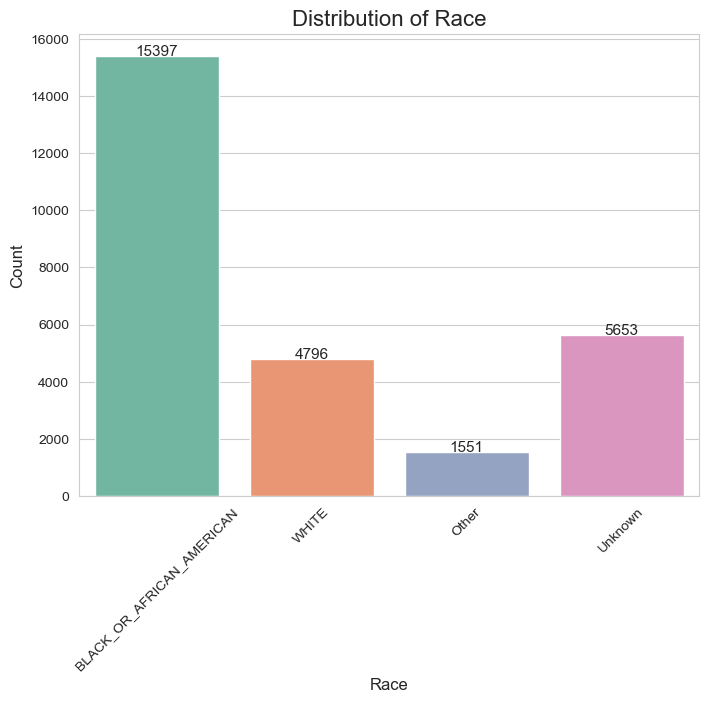

In [572]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))


# Get the top three categories in the race column
top_three = df['race'].value_counts().nlargest(3).index.tolist()

# Replace all other categories with 'Other'
df.loc[~df['race'].isin(top_three), 'race'] = 'Other'

# Plot the bar chart using Seaborn
sns.countplot(x='race', data=df, palette='Set2', ax=ax)

# Set axis labels and title
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Race', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 2, 
            str(i.get_height()), fontsize=11, ha='center')

plt.show()

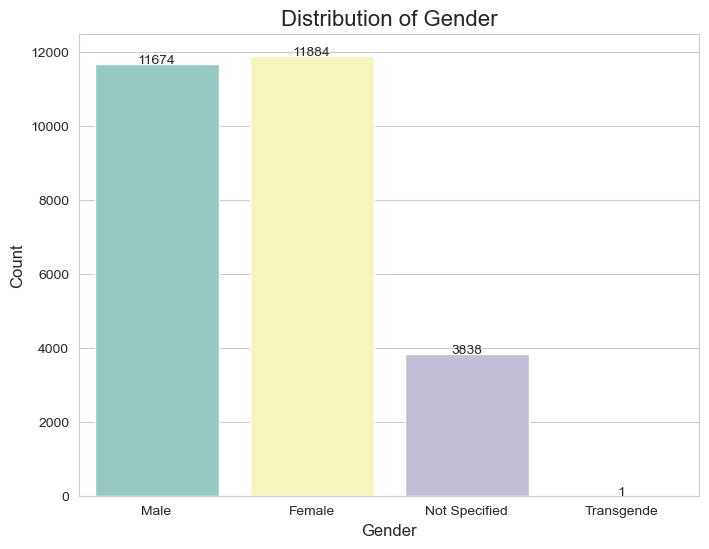

In [573]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.countplot(x='gender', data=df, palette='Set3', ax=ax)

# Set axis labels and title
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Gender', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(i.get_height()), fontsize=10, ha='center')

plt.show()

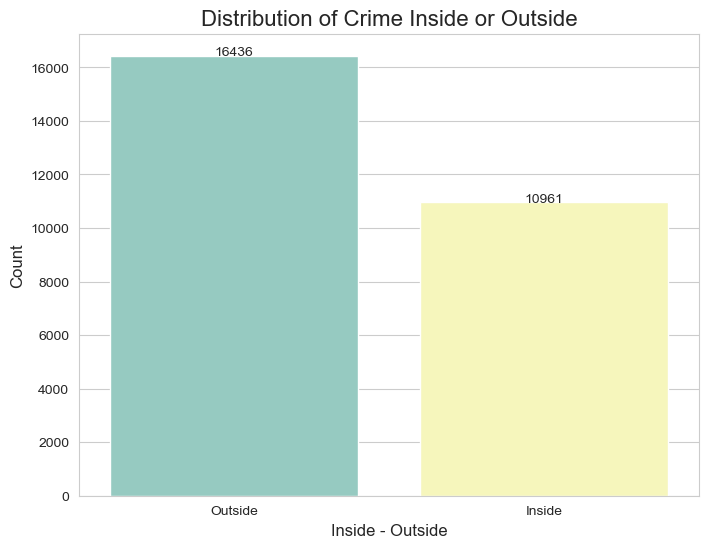

In [574]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.countplot(x='inside_outside', data=df, palette='Set3', ax=ax)

# Set axis labels and title
ax.set_xlabel('Inside - Outside', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Crime Inside or Outside', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(i.get_height()), fontsize=10, ha='center')

plt.show()

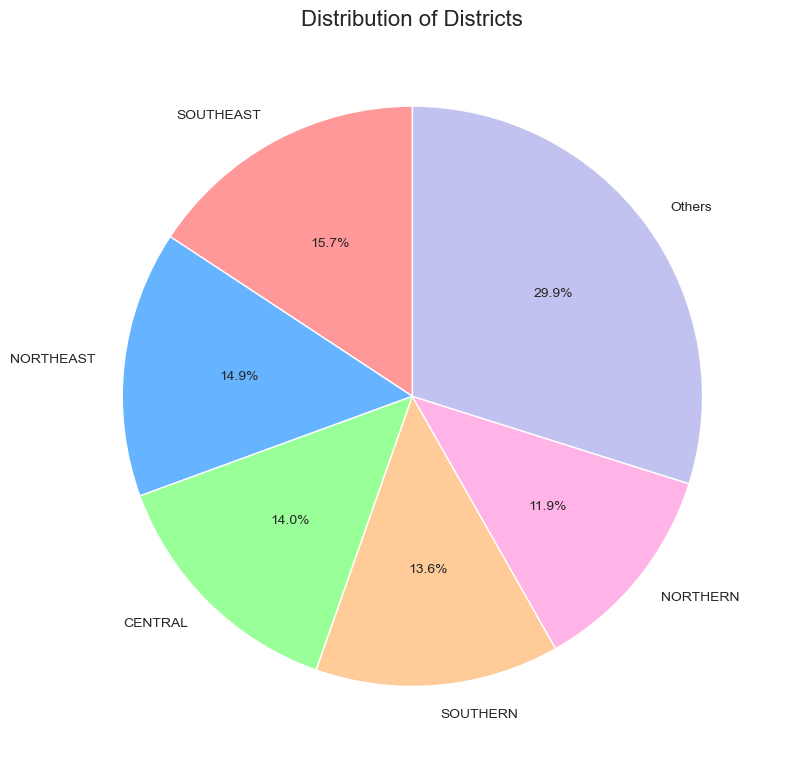

In [575]:
# Get value counts for the "district" column
district_counts = df['district'].value_counts()

# Create a new "district" series with top five and "Others"
top_districts = district_counts[:5]
other_districts = pd.Series(district_counts[6:].sum(), index=['Others'])
district_series = pd.concat([top_districts, other_districts])

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0']

# Plot the pie chart
district_series.plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, colors=colors)

# Set axis labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Distribution of Districts', fontsize=16)

# Add spacing around the chart
plt.tight_layout()

plt.show()


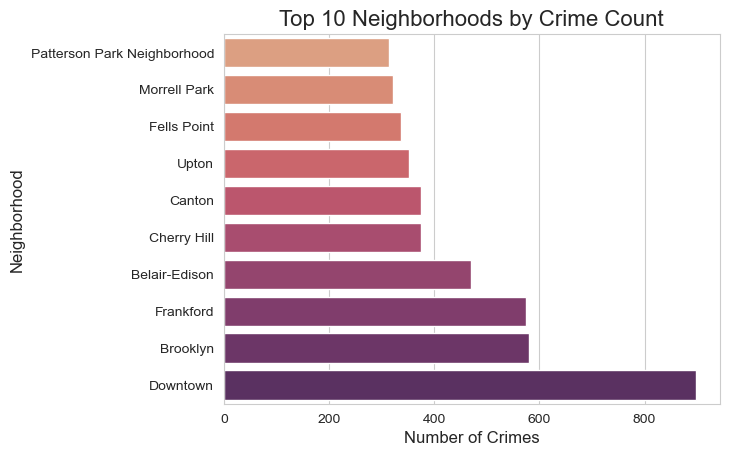

In [576]:
# Create a dictionary of neighborhood counts
neighborhood_counts = dict(df['neighborhood'].value_counts())

# Sort the dictionary by values in descending order
sorted_counts = sorted(neighborhood_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 neighborhoods and their counts
top_neighborhoods = dict(sorted_counts[:10])

# Create a new dataframe with the top 10 neighborhoods
df_top = df[df['neighborhood'].isin(top_neighborhoods)]

# Group the data by neighborhood and count the number of crimes
neighborhood_crime_counts = df_top.groupby('neighborhood')['description'].count()

# Sort the neighborhoods by crime count in descending order
sorted_neighborhoods = neighborhood_crime_counts.sort_values(ascending=True)

# Create a bar plot of the top 10 neighborhoods and their crime counts
sns.barplot(x=sorted_neighborhoods.values[:10], y=sorted_neighborhoods.index[:10], palette="flare")

# Set axis labels and title
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title('Top 10 Neighborhoods by Crime Count', fontsize=16)

# Show the plot
plt.show()


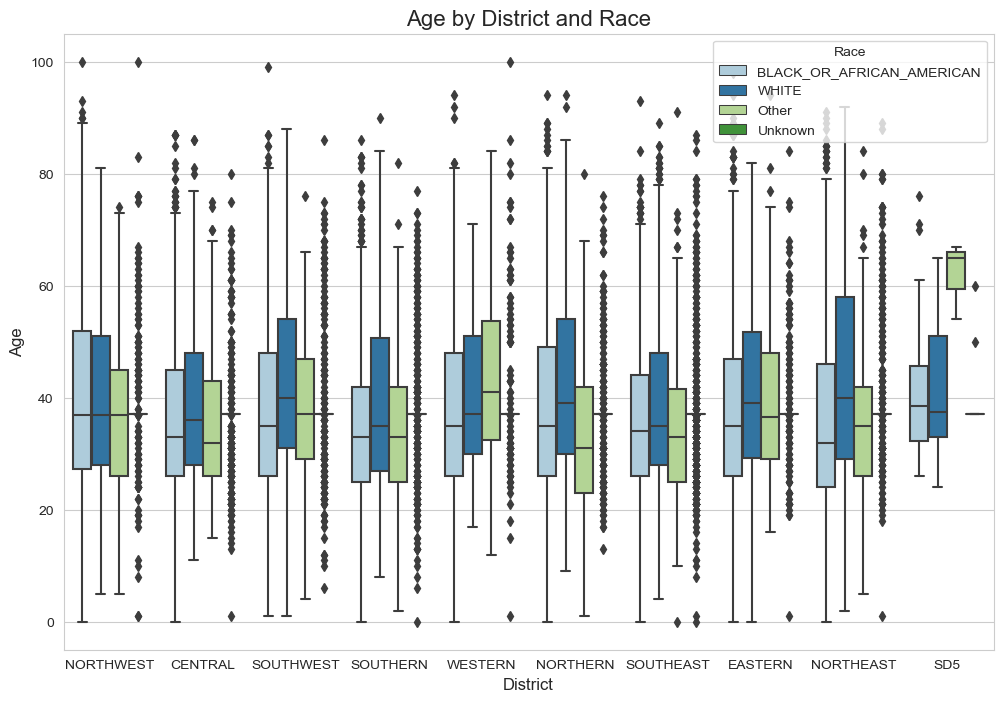

In [577]:
#Create a boxplot for the 'age' column by 'district', with 'race' as the hue and assign it to the axes (ax)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='district', y='age', data=df, hue='race', palette='Paired', width=0.8)

#Add title and axis labels
plt.title('Age by District and Race', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Age', fontsize=12)

#Set legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Race', loc='upper right')

plt.show()

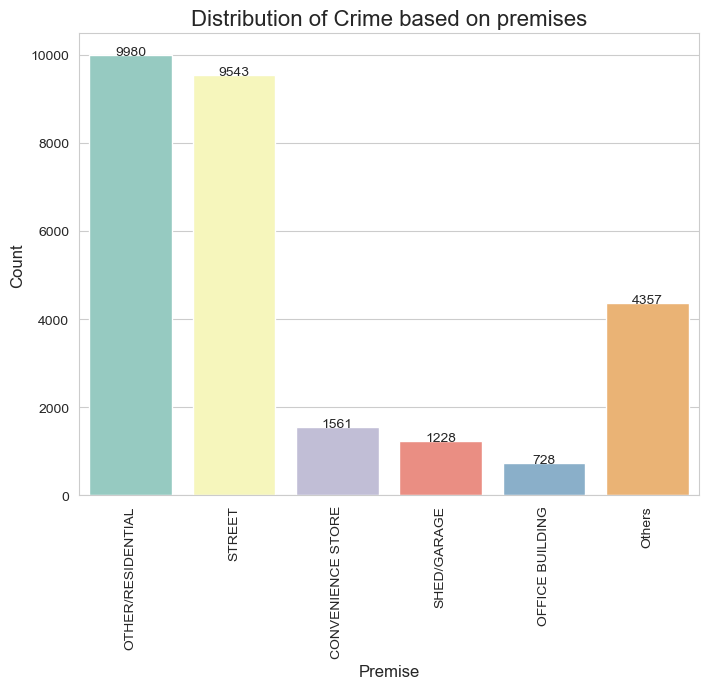

In [578]:
# Get value counts for the "premise" column
premise_counts = df['premise'].value_counts()

# Create a new "premise" series with top five and "Others"
top_premise = premise_counts[:5]
other_premise = premise_counts[5:].sum()
premise_series = pd.concat([top_premise, pd.Series(other_premise, index=['Others'])])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Plot the bar chart using Seaborn
sns.barplot(x=premise_series.index, y=premise_series.values, palette='Set3', ax=ax)

# Set axis labels and title
ax.set_xlabel('Premise', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Crime based on premises', fontsize=16)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add text labels above each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
            str(int(i.get_height())), fontsize=10, ha='center')

plt.show()


In [579]:
df.to_csv('cleaned.csv', index=False)

# Data Analysis

### Identifying Key Patterns:

#### Crime Rate by it's types

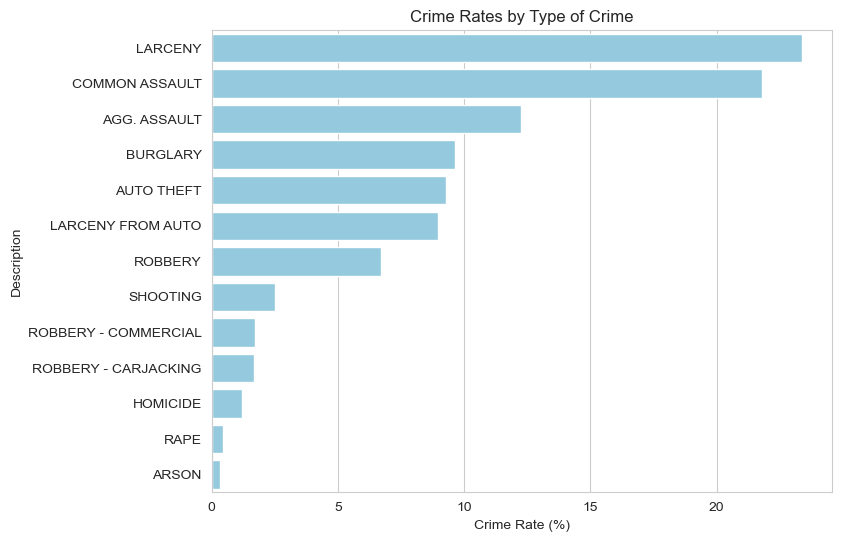

In [580]:
# Group the data by description and count the number of crimes
desc_count = df.groupby('description')['description'].count()

# Calculate the total number of crimes across all descriptions
total_crime = desc_count.sum()

# Calculate the crime rate for each description
desc_crime_rate = desc_count / total_crime * 100

# Sort the crime rates in descending order
desc_crime_rate = desc_crime_rate.sort_values(ascending=False)

# Create a horizontal bar chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=desc_crime_rate.values, y=desc_crime_rate.index, ax=ax, color='skyblue')

# Add axis labels and title
ax.set_xlabel('Crime Rate (%)')
ax.set_ylabel('Description')
ax.set_title('Crime Rates by Type of Crime')

# Show the plot
plt.show()


#### Crime Rate by months:

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


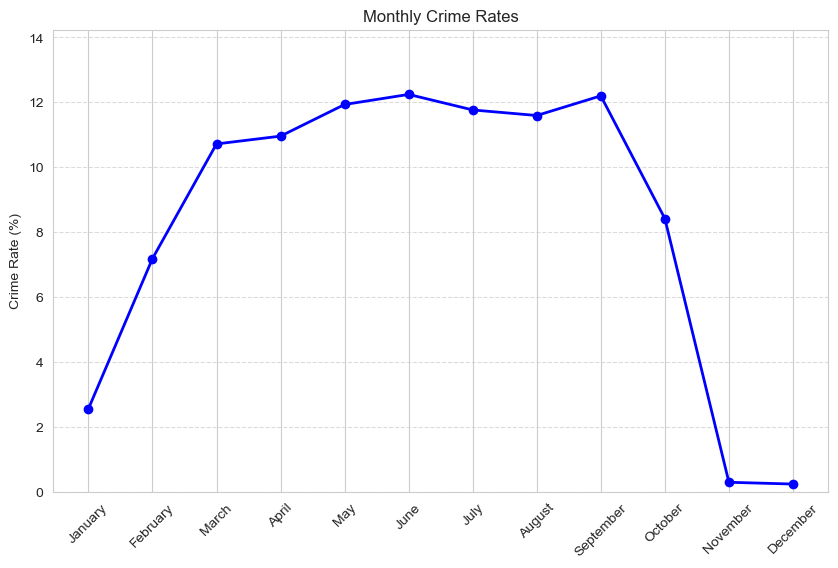

In [581]:
# Define the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as a line graph
ax.plot(monthly_crime_rates_ordered.index, monthly_crime_rates_ordered.values, color='blue', marker='o', linewidth=2)

# Set the x-axis labels and tick marks
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)

# Set the y-axis label and limits
ax.set_ylabel('Crime Rate (%)')
ax.set_ylim(0, monthly_crime_rates_ordered.max() + 2)

# Set the title
ax.set_title('Monthly Crime Rates')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Crime by district and crime description:

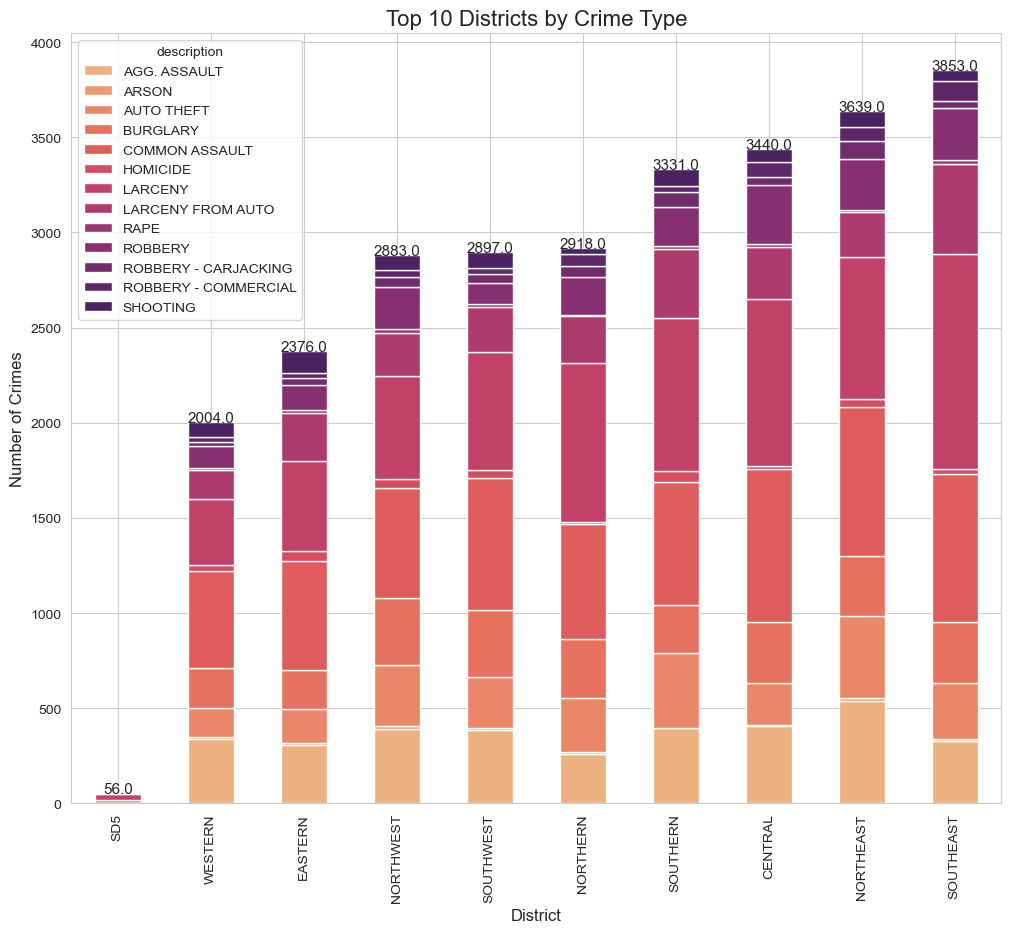

In [582]:
# Group the data by district and crime description, and count the number of crimes
district_crime_counts = df.groupby(['district', 'description'])['description'].count().unstack()

# Add a total column to the dataframe
district_crime_counts['Total'] = district_crime_counts.sum(axis=1)

# Sort the dataframe by the 'Total' column in ascending order
district_crime_counts_sorted = district_crime_counts.sort_values(by="Total", ascending=True)

# Remove the total value from the selected descriptions
top_10_districts = district_crime_counts_sorted.iloc[:10, :-1]

# Create a stacked bar plot of the top 10 districts and their crime counts by type
ax = top_10_districts.plot(kind='bar', stacked=True, figsize=(12,10), cmap='flare')

# Add total number of crimes above each district bar
for i, gender in enumerate(top_10_districts.index):
    total = top_10_districts.iloc[i].sum()
    ax.text(i, total, total, ha='center', fontsize=11)

# Set axis labels and title
ax.set_xlabel('District', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_title('Top 10 Districts by Crime Type', fontsize=16)

# Show the plot
plt.show()


#### Crimes with or without weapons:

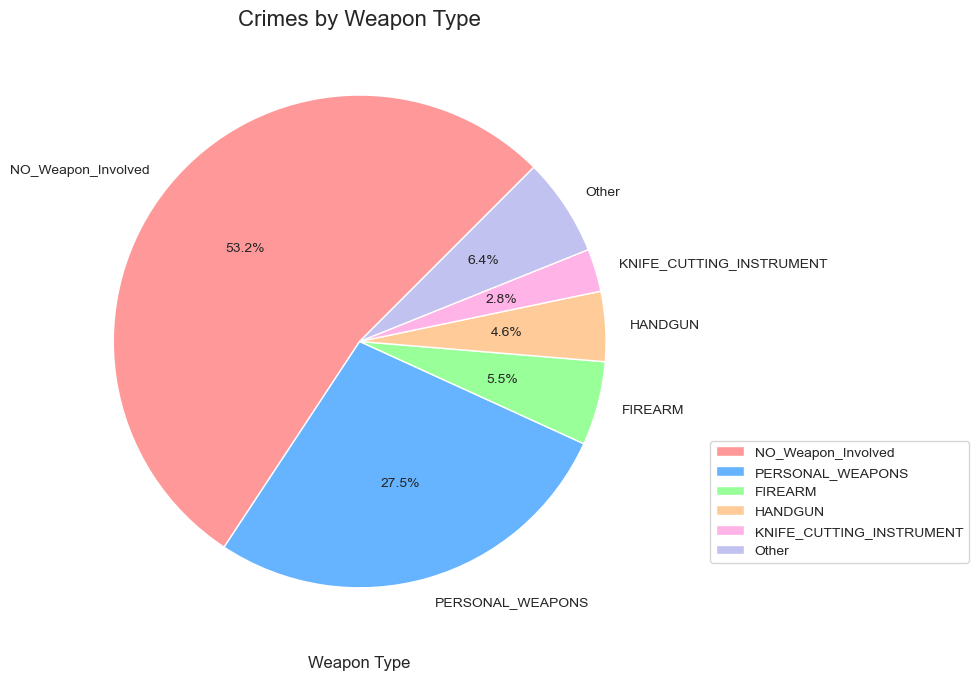

In [583]:
# Group the data by weapon and count the number of crimes
weapon_counts = df.groupby('weapon')['weapon'].count()

# Keep only the top 6 values and group the rest as "Other"
top_6 = weapon_counts.nlargest(5)
other = pd.Series([weapon_counts.sum() - top_6.sum()], index=['Other'])
weapon_counts = top_6.append(other)

# Set colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6','#c2c2f0','#ffb366']

# Create a pie chart of the weapon counts
ax = weapon_counts.plot(kind='pie', figsize=(8,8), colors=colors, autopct='%1.1f%%', startangle=45)

# Set axis labels and title
ax.set_xlabel('Weapon Type', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_title('Crimes by Weapon Type', fontsize=16)

# Add a legend with the percentage values
ax.legend(labels=weapon_counts.index, loc='upper right', bbox_to_anchor=(1.5, 0.35))

# Remove the y-axis label and ticks
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', length=0)

# Show the plot
plt.show()




#### Crime by age group and gender:

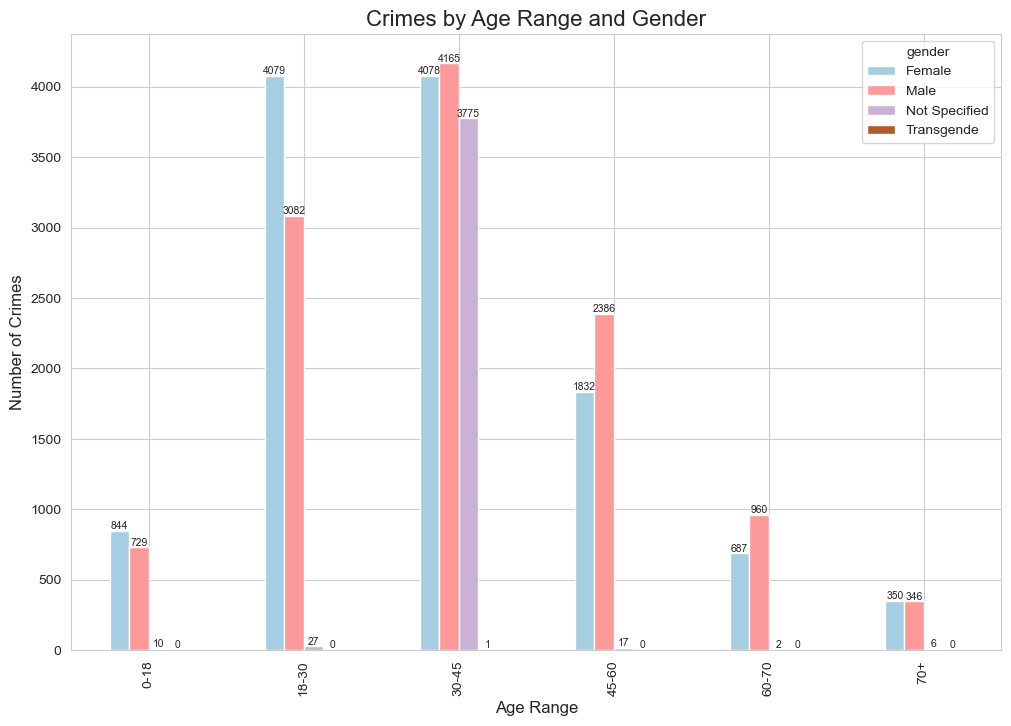

In [584]:
# Create age ranges using the pd.cut function
age_ranges = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 70, 120], labels=['0-18', '18-30', '30-45', '45-60', '60-70', '70+'])

# Group the data by age range and gender, and count the number of crimes
age_gender_counts = df.groupby([age_ranges, 'gender'])['gender'].count().unstack()

# Create a stacked bar chart of the age and gender counts
ax = age_gender_counts.plot(kind='bar', figsize=(12,8), cmap='Paired')

# Set axis labels and title
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_title('Crimes by Age Range and Gender', fontsize=16)

# Add text in each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=7.5)

# Show the plot
plt.show()



#### Crime by Age groups and Race

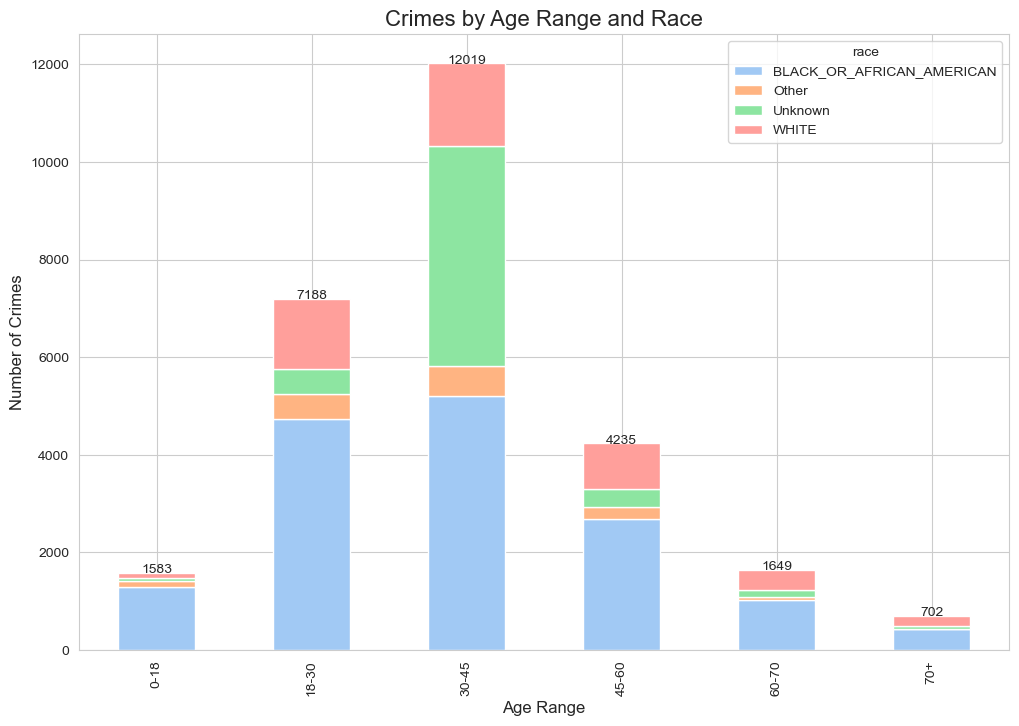

In [585]:
# Group the data by age range and race, and count the number of crimes
age_race_counts = df.groupby([age_ranges, 'race'])['race'].count().unstack()

# Create a stacked bar chart of the age and race counts
ax = age_race_counts.plot(kind='bar', stacked=True, figsize=(12,8))

# Add total number of crimes above each gender bar
for i, gender in enumerate(age_race_counts.index):
    total = age_race_counts.iloc[i].sum()
    ax.text(i, total, total, ha='center', fontsize=10)

# Set axis labels and title
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_title('Crimes by Age Range and Race', fontsize=16)

# Show the plot
plt.show()


#### Crime by Gender and Race

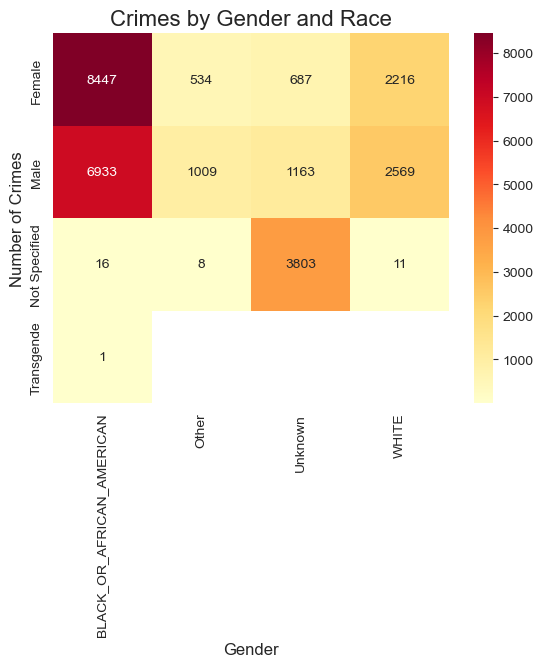

In [586]:
# Group the data by gender and race and count the number of crimes
gender_race_counts = df.groupby(['gender', 'race'])['race'].count().unstack()

# Create a heatmap of the gender and race counts
sns.heatmap(gender_race_counts, cmap='YlOrRd', annot=True, fmt='g')

# Set axis labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.title('Crimes by Gender and Race', fontsize=16)

# Add total number of crimes above each gender bar
for i, gender in enumerate(gender_race_counts.index):
    total = gender_race_counts.iloc[i].sum()
    ax.text(i, total, total, ha='center', fontsize=10)

# Show the plot
plt.show()


#### Crime by time_of_day and inside_outside:

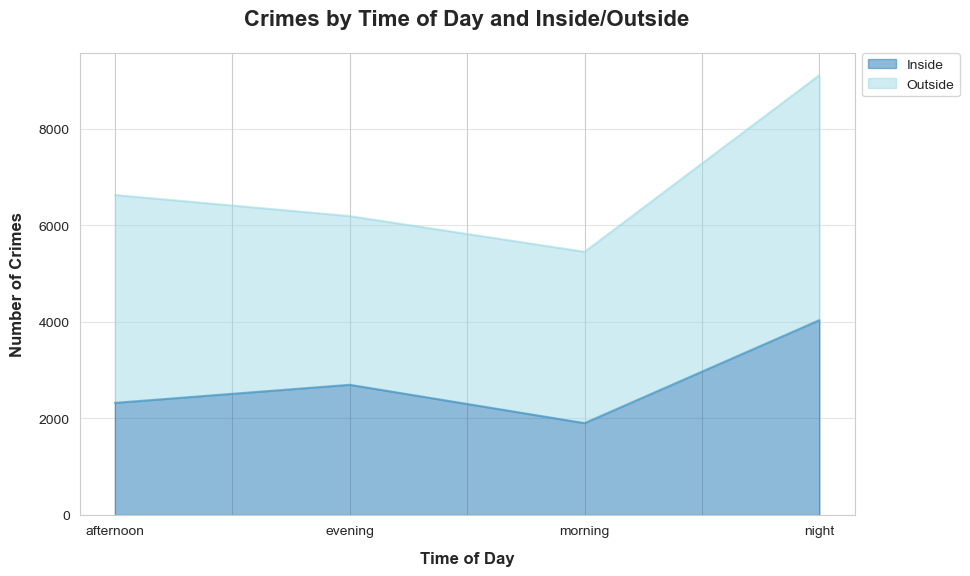

In [587]:
# Group the data by time_of_day and inside_outside and count the number of crimes
time_inside_outside_counts = df.groupby(['time_of_day', 'inside_outside'])['inside_outside'].count().unstack()

# Create a stacked area chart of the time_of_day and inside_outside counts
time_inside_outside_counts.plot(kind='area', stacked=True, alpha=0.5, cmap='tab20', figsize=(10, 6))

# Set axis labels and title
plt.xlabel('Time of Day', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Number of Crimes', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Crimes by Time of Day and Inside/Outside', fontsize=16, fontweight='bold', pad=20)

# Customize legend
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., fontsize=10)

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)

# Show the plot
plt.show()
